In [342]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coffee-sales/index.csv


In [343]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [344]:
#Reading and viewing the dataset
df=pd.read_csv("/kaggle/input/coffee-sales/index.csv")
df.head(10)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate
7,2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk
8,2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa
9,2024-03-01,2024-03-01 19:23:15.887,card,ANON-0000-0000-0008,33.8,Americano with Milk


In [345]:
# Shape of dataset
df.shape


(1133, 6)

HAS 1133 ROWS AND 6 COLUMNS


In [346]:
#Information on datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [347]:
#converting date and datetime to datetime datatype from object
datetime_columns=["date","datetime"]
for col in datetime_columns:
    df[col]=pd.to_datetime(df[col])

FLOAT-1, OBJECT-5

date,datetime can be converted to datetime

In [348]:
# creating day,month,year and time columns
df['year']=df['date'].dt.strftime('%Y')
df['month']=df['date'].dt.strftime('%m')
df['day']=df['date'].dt.strftime('%w')
df['time'] = df['datetime'].dt.strftime('%I-%p')

df.head()

,date,datetime,cash_type,card,money,coffee_name,year,month,day,time
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,2024,03,5,10-AM
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024,03,5,12-PM
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024,03,5,12-PM
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,2024,03,5,01-PM
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,2024,03,5,01-PM


In [349]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,1133,2024-05-19 11:36:29.232127232,2024-03-01 00:00:00,2024-04-14 00:00:00,2024-05-23 00:00:00,2024-06-22 00:00:00,2024-07-31 00:00:00,NaN
datetime,1133,2024-05-20 02:38:39.053382912,2024-03-01 10:15:50.520000,2024-04-14 10:55:27.406000128,2024-05-23 12:22:06.604999936,2024-06-22 08:39:50.272999936,2024-07-31 21:55:16.570000,NaN
money,1133.0,33.105808,18.12,28.9,32.82,37.72,40.0,5.035366


TOTAL OF 1133 TRANSCATIONS

In [350]:
#Dropping less import column(s)
df=df.drop(["card"],axis=1)

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   datetime64[ns]
 1   datetime     1133 non-null   datetime64[ns]
 2   cash_type    1133 non-null   object        
 3   money        1133 non-null   float64       
 4   coffee_name  1133 non-null   object        
 5   year         1133 non-null   object        
 6   month        1133 non-null   object        
 7   day          1133 non-null   object        
 8   time         1133 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 79.8+ KB


In [352]:
#Looking for different categories
cash_types=df.cash_type.value_counts()
print(cash_types)
print("-"*25)
coffee_types=df.coffee_name.value_counts()
print(coffee_types)


cash_type
card    1044
cash      89
Name: count, dtype: int64
-------------------------
coffee_name
Americano with Milk    268
Latte                  243
Cappuccino             196
Americano              169
Cortado                 99
Hot Chocolate           74
Espresso                49
Cocoa                   35
Name: count, dtype: int64


PAYMNET DONE THROUGH CARD OR CASH

THE VENDING MACHINE HAS 8 DIFFERENT TYPES OF BEVERAGES (COFFEE BEVERAGES-6, CHOCOLATE BEVERAGES-2)

cash_type
card    0.921447
cash    0.078553
Name: proportion, dtype: float64


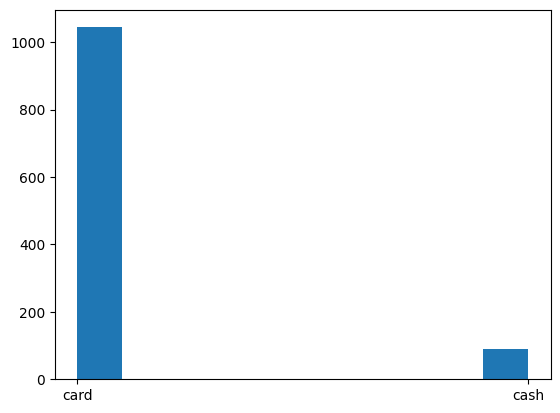

In [353]:
#plotting histogram
df['cash_type'].hist(grid=False)

print(df.cash_type.value_counts(normalize=True))

MOST OF THE TRANSACTIONS ARE DONE BY CARD

In [354]:
pd.DataFrame(df['coffee_name'].value_counts(normalize=True).sort_values(ascending=False).round(3)*100)

,proportion
coffee_name,
Americano with Milk,23.7
Latte,21.4
Cappuccino,17.3
Americano,14.9
Cortado,8.7
Hot Chocolate,6.5
Espresso,4.3
Cocoa,3.1


AMERICANO WITH MILK IS MORE POPULAR, FOLLOWED BY LATTE AND THE LEAST ONE IS COCOA

In [355]:
#Mapping cash_type to 0 and 1
df['cash_type'] = df['cash_type'].map({'card': 0, 'cash': 1})

In [356]:
#checking for null values
df.isna().sum()

date           0
datetime       0
cash_type      0
money          0
coffee_name    0
year           0
month          0
day            0
time           0
dtype: int64

NO NULL VALUES PRESENT

In [357]:
# Date duration
print(df["date"].min())
print(df["date"].max())



2024-03-01 00:00:00
2024-07-31 00:00:00


DATE RECORDED FROM MARCH 1ST 2024 TO JULY 31ST 2024


In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   datetime64[ns]
 1   datetime     1133 non-null   datetime64[ns]
 2   cash_type    1133 non-null   int64         
 3   money        1133 non-null   float64       
 4   coffee_name  1133 non-null   object        
 5   year         1133 non-null   object        
 6   month        1133 non-null   object        
 7   day          1133 non-null   object        
 8   time         1133 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 79.8+ KB


In [359]:
#typecasting
cols=["year","month","day"]
df[cols] = df[cols].astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   datetime64[ns]
 1   datetime     1133 non-null   datetime64[ns]
 2   cash_type    1133 non-null   int64         
 3   money        1133 non-null   float64       
 4   coffee_name  1133 non-null   object        
 5   year         1133 non-null   int64         
 6   month        1133 non-null   int64         
 7   day          1133 non-null   int64         
 8   time         1133 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(4), object(2)
memory usage: 79.8+ KB


In [360]:
revenue = df.groupby(['coffee_name']).sum(['money']).reset_index().sort_values(by='money',ascending=False)

Text(0.5, 0, 'Revenue')

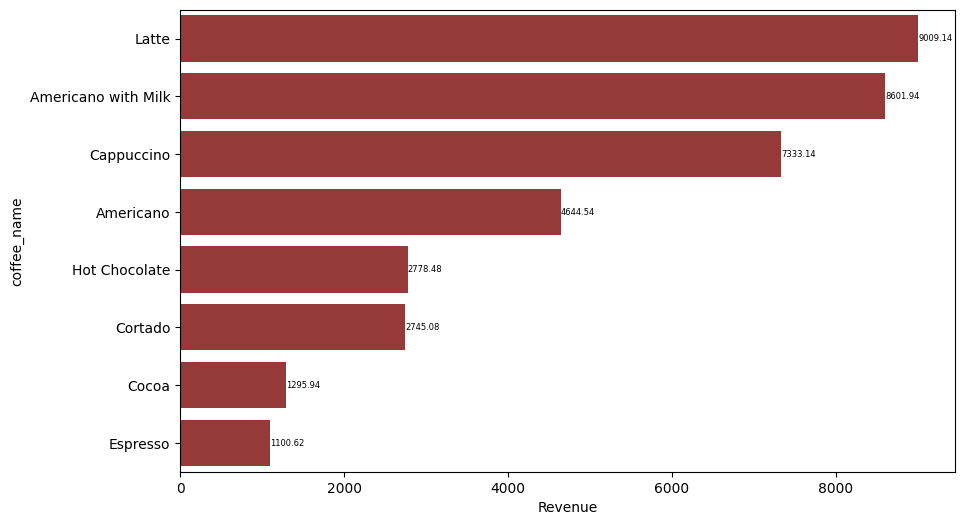

In [361]:
#plotting bargraph for revenue vs coffee names
plt.figure(figsize=(10,6))
ax = sns.barplot(data=revenue,x='money',y='coffee_name',color='brown')
ax.bar_label(ax.containers[0], fontsize=6)
plt.xlabel('Revenue')

LATTE PRODUCES THE HIGESHT REVENUE WHILE THE LEAST BEING EXPRESSO

In [362]:
monthly_sales = df.groupby(['coffee_name','month']).count()['date'].reset_index().rename(columns={'date':'count'}).pivot(index='month',columns='coffee_name',values='count').reset_index()
monthly_sales

coffee_name,month,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,3,36,34,20,6,30,10,22,48
1,4,35,42,43,6,19,7,13,31
2,5,48,58,55,9,17,8,14,58
3,6,14,69,46,5,19,10,14,50
4,7,36,65,32,9,14,14,11,56


([<matplotlib.axis.XTick at 0x7cdb7838af20>,
 [Text(0, 0, '3'),
  Text(1, 0, '4'),
  Text(2, 0, '5'),
  Text(3, 0, '6'),
  Text(4, 0, '7')])

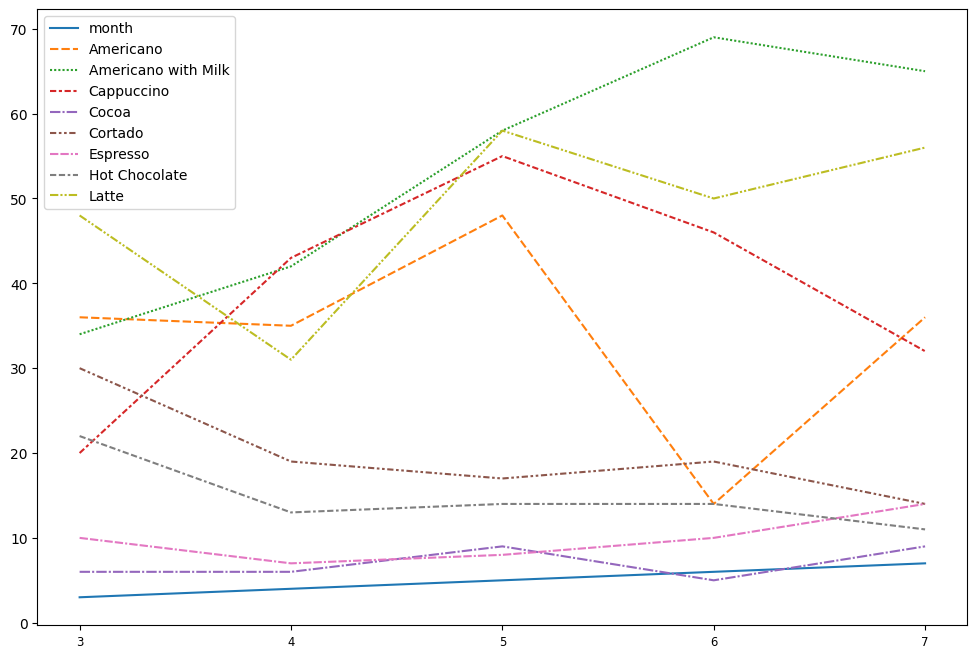

In [363]:
#plotting linegraph for month vs coffee names
plt.figure(figsize=(12,8))
sns.lineplot(data=monthly_sales)
plt.legend(loc='upper left')
plt.xticks(range(len(monthly_sales['month'])),monthly_sales['month'],size='small')

AMERICANO WITH MILK SALES INCREASE OVER MONTHS(HIGHEST SPIKE IN JUNE)

In [364]:
weekday_sales = df.groupby(['day']).count()['date'].reset_index().rename(columns={'date':'count'})
weekday_sales

,day,count
0,0,151
1,1,151
2,2,185
3,3,165
4,4,164
5,5,163
6,6,154


([<matplotlib.axis.XTick at 0x7cdb782ac610>,
 [Text(0, 0, 'Sun'),
  Text(1, 0, 'Mon'),
  Text(2, 0, 'Tue'),
  Text(3, 0, 'Wed'),
  Text(4, 0, 'Thur'),
  Text(5, 0, 'Fri'),
  Text(6, 0, 'Sat')])

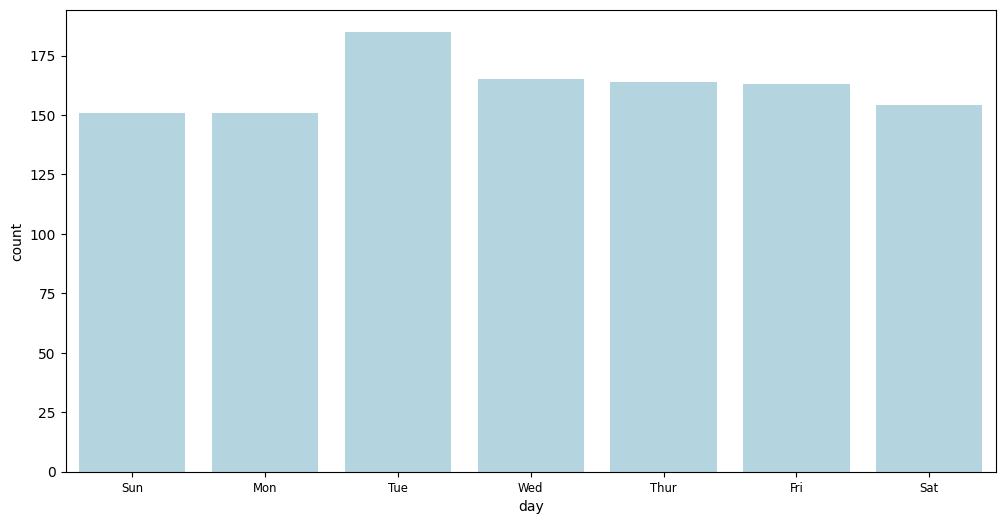

In [365]:
#plotting bargraph for days vs sales
plt.figure(figsize=(12,6))
sns.barplot(data=weekday_sales,x='day',y='count',color='lightblue')
plt.xticks(range(len(weekday_sales['day'])),['Sun','Mon','Tue','Wed','Thur','Fri','Sat'],size='small')

TUESDAY HAS HIGHEST SALES AND REST ALL DAYS ARE RELATIVELY SAME.

In [366]:
hourly_sales = df.groupby(['time']).count()['date'].reset_index().rename(columns={'date':'count'})
hourly_sales

,time,count
0,01-PM,78
1,02-PM,76
2,03-PM,65
3,04-PM,77
4,05-PM,77
5,06-PM,75
6,07-AM,13
7,07-PM,96
8,08-AM,44
9,08-PM,54


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '07-AM'),
  Text(1, 0, '10-PM'),
  Text(2, 0, '08-AM'),
  Text(3, 0, '09-AM'),
  Text(4, 0, '08-PM'),
  Text(5, 0, '03-PM'),
  Text(6, 0, '09-PM'),
  Text(7, 0, '06-PM'),
  Text(8, 0, '02-PM'),
  Text(9, 0, '04-PM'),
  Text(10, 0, '05-PM'),
  Text(11, 0, '01-PM'),
  Text(12, 0, '12-PM'),
  Text(13, 0, '07-PM'),
  Text(14, 0, '11-AM'),
  Text(15, 0, '10-AM')])

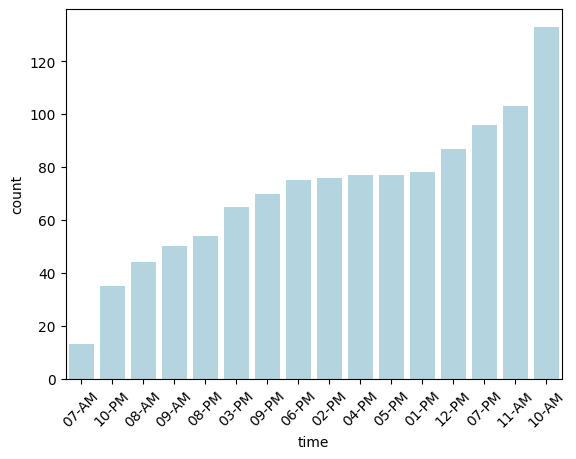

In [367]:
#plotting bargraph for time vs sales
sns.barplot(data=hourly_sales.sort_values(by='count', ascending=True),x='time',y='count',color='lightblue')
plt.xticks(rotation=45, fontsize=10)

In [368]:
hourly_sales_by_coffee = df.groupby(['time','coffee_name']).count()['date'].reset_index().rename(columns={'date':'count'}).pivot(index='time',columns='coffee_name',values='count').fillna(0).reset_index()
hourly_sales_by_coffee

coffee_name,time,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,01-PM,18.0,18.0,10.0,2.0,12.0,3.0,4.0,11.0
1,02-PM,15.0,18.0,13.0,4.0,6.0,5.0,2.0,13.0
2,03-PM,14.0,15.0,8.0,0.0,3.0,4.0,6.0,15.0
3,04-PM,10.0,18.0,12.0,3.0,12.0,5.0,4.0,13.0
4,05-PM,9.0,11.0,18.0,4.0,6.0,4.0,7.0,18.0
5,06-PM,9.0,16.0,12.0,2.0,5.0,5.0,10.0,16.0
6,07-AM,5.0,4.0,1.0,0.0,1.0,0.0,0.0,2.0
7,07-PM,5.0,18.0,34.0,2.0,5.0,1.0,9.0,22.0
8,08-AM,10.0,7.0,8.0,1.0,6.0,0.0,0.0,12.0
9,08-PM,1.0,12.0,13.0,6.0,5.0,3.0,6.0,8.0


DURING THE MORNING AT 10AM, SALES ARE HIGH.(START OF THE DAY, NEED THE COFFEE TO KICK IN!)

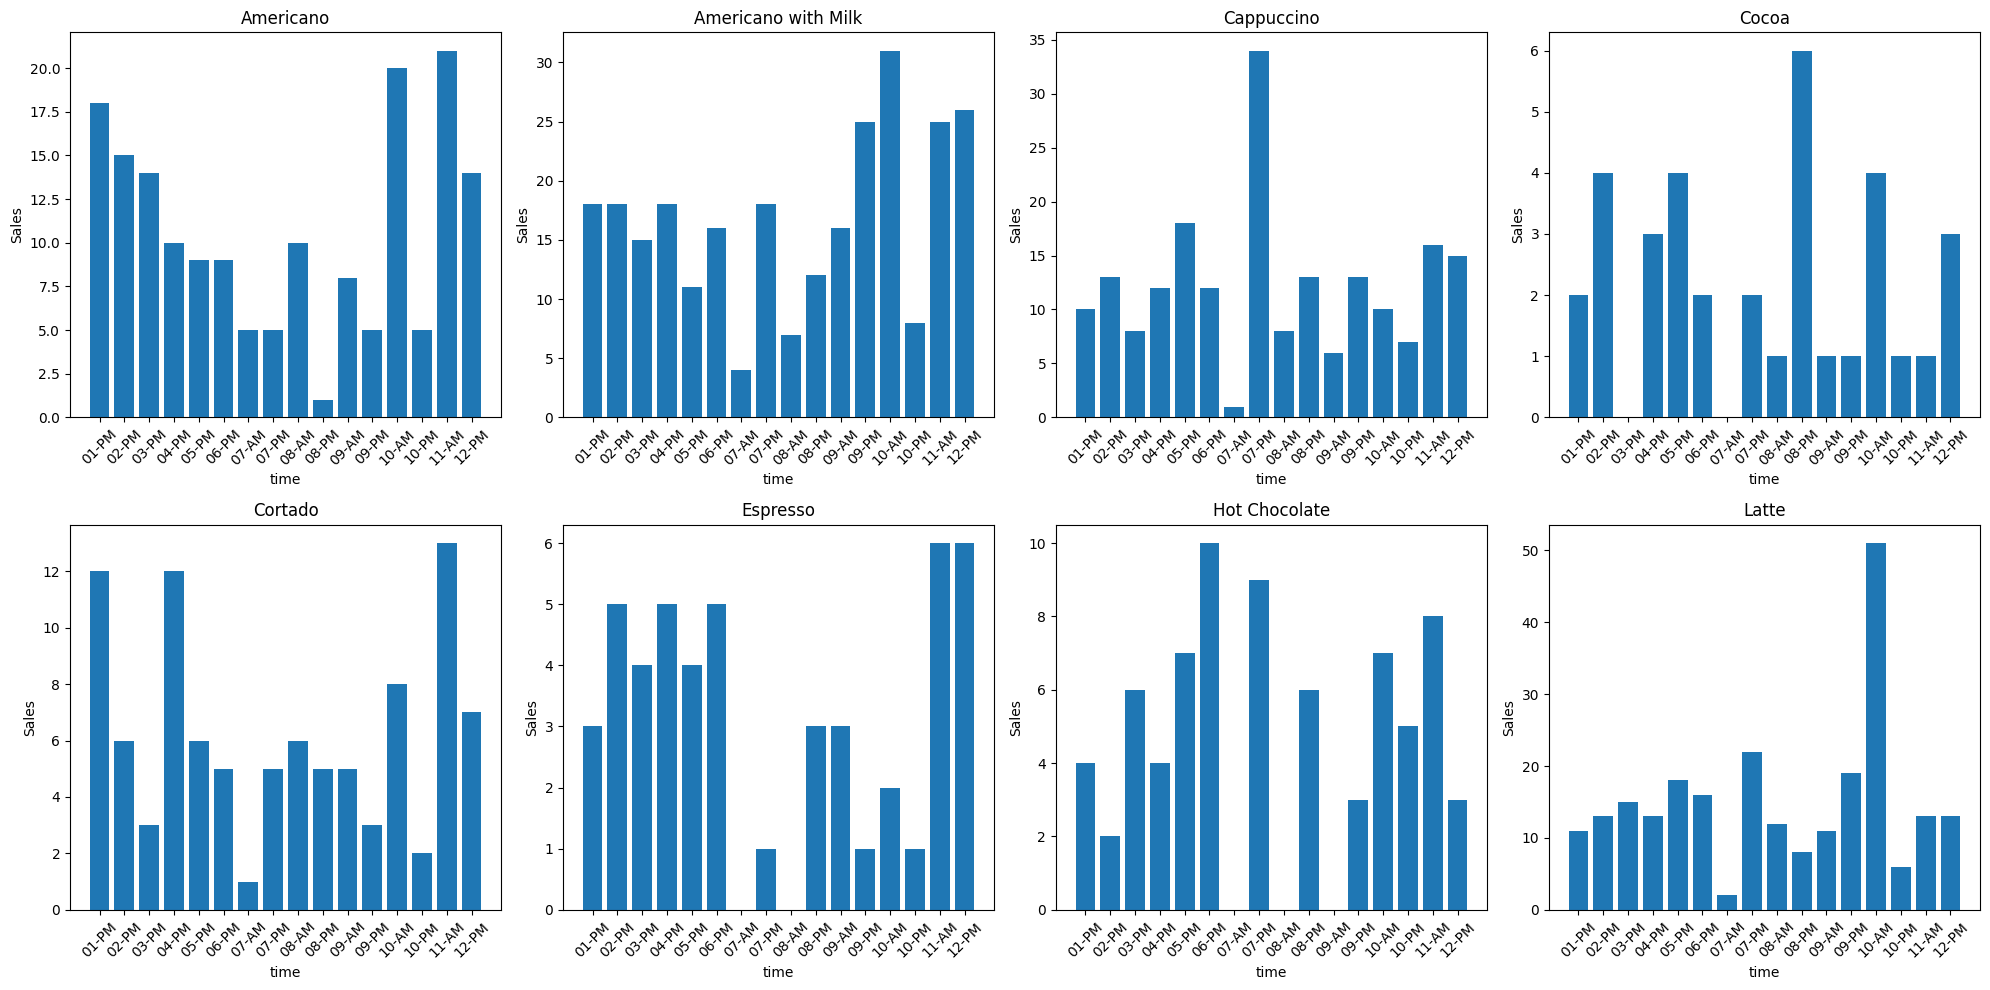

In [369]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.flatten()

for i, column in enumerate(hourly_sales_by_coffee.columns[1:]): 
    axs[i].bar(hourly_sales_by_coffee['time'], hourly_sales_by_coffee[column])
    axs[i].set_title(f'{column}')
    axs[i].set_xlabel('time')
    axs[i].set_ylabel('Sales')
    axs[i].tick_params(axis='x', rotation=45)
   
    
plt.tight_layout()

plt.show()

ALL PRODUCTS EXPERIENCE PEAK TRAFFIC AT 10 AM,CAPPUCCINO, COCOA AND HOT CHOCOLATE ARE POPULAR IN THE EVENING(BETWEEN 6:00PM TO 8:00PM).